In [1]:
from tensorflow import keras
import keras.applications as models

Using TensorFlow backend.


In [2]:
"""
# 98 MB
resnet = models.resnet50.ResNet50(weights='imagenet', include_top=False)
# 528MB
vgg16 = models.vgg16.VGG16(weights='imagenet', include_top=False)
# 23MB
nnm = models.NASNetMobile(weights='imagenet', include_top=False)
"""

"\n# 98 MB\nresnet = models.resnet50.ResNet50(weights='imagenet', include_top=False)\n# 528MB\nvgg16 = models.vgg16.VGG16(weights='imagenet', include_top=False)\n# 23MB\nnnm = models.NASNetMobile(weights='imagenet', include_top=False)\n"

In [3]:
effnet = keras.applications.EfficientNetB0(weights='imagenet', include_top=True)
effnet.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

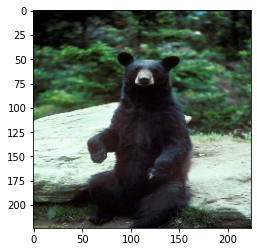

In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.vgg16 import preprocess_input

import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Public domain image
url = 'https://upload.wikimedia.org/wikipedia/commons/0/02/Black_bear_large.jpg'
urllib.request.urlretrieve(url, 'bear.jpg')

file = image.load_img('bear.jpg', target_size=(224, 224))
plt.imshow(file)

In [5]:
img = image.img_to_array(file)
img = np.expand_dims(img, 0)
img_preprocessed = preprocess_input(img)
print(img.shape)

(1, 224, 224, 3)


In [6]:
pred = effnet.predict(img)

In [7]:
print(keras.applications.imagenet_utils.decode_predictions(pred))

[[('n02133161', 'American_black_bear', 0.5373192), ('n02132136', 'brown_bear', 0.19469535), ('n02134418', 'sloth_bear', 0.08824378), ('n02509815', 'lesser_panda', 0.007512372), ('n02510455', 'giant_panda', 0.007425371)]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


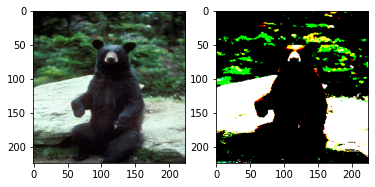

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(np.squeeze(file))
ax[1].imshow(np.squeeze(img_preprocessed))

In [9]:
pred = effnet.predict(img_preprocessed)
print(keras.applications.imagenet_utils.decode_predictions(pred))

[[('n02132136', 'brown_bear', 0.71527547), ('n02133161', 'American_black_bear', 0.1566744), ('n02134418', 'sloth_bear', 0.012813882), ('n02134084', 'ice_bear', 0.0067828624), ('n02117135', 'hyena', 0.005042278)]]


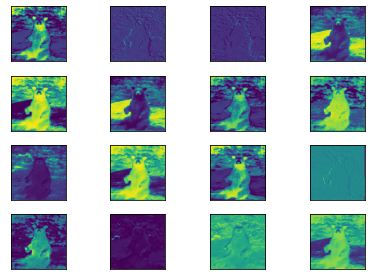

In [10]:
model = keras.Model(inputs=effnet.inputs, outputs=effnet.layers[6].output)
feature_maps = model.predict(img_preprocessed)

ix = 1
for _ in range(4):
    for _ in range(4):
        # specify subplot and turn of axis
        ax = plt.subplot(4, 4, ix)
        ax.imshow(feature_maps[0, :, :, ix-1])
        ax.set_xticks([])
        ax.set_yticks([])
        ix += 1
        
plt.tight_layout()
plt.show()

In [11]:
# When adding new layers, we also need to define the input_shape
# so that  the new Dense layers have a fixed input_shape as well
effnet_base = keras.applications.EfficientNetB0(weights='imagenet', 
                                          include_top=False, 
                                          input_shape=((224, 224, 3)))

effnet_base.trainable = False

In [12]:
#for layer in effnet_base.layers[:-2]:
#    layer.trainable = False    
#effnet_base.summary()

In [13]:
#new_model = keras.Sequential()
#new_model.add(effnet_base)
#new_model.add(keras.layers.GlobalAveragePooling2D())
#new_model.add(keras.layers.Dropout(0.2))
#new_model.add(keras.layers.Dense(100, activation='softmax'))

conv2d = keras.layers.Conv2D(7, 7)(effnet_base.output, training=False)
bn = keras.layers.BatchNormalization()(conv2d)
gap = keras.layers.GlobalAveragePooling2D()(bn)
do = keras.layers.Dropout(0.2)(gap)
flatten = keras.layers.Flatten()(do)
fc1 = keras.layers.Dense(512, activation='relu')(flatten)
output = keras.layers.Dense(10, activation='softmax')(fc1)

new_model = keras.Model(inputs=effnet_base.input, outputs=output)

#flatten = keras.layers.Flatten()(effnet_base.output, training=False)
#do = keras.layers.Dropout(0.3)(flatten)
#bn = keras.layers.BatchNormalization()(do)
#fc1 = keras.layers.Dense(1024, activation='relu')(bn)
#fc2 = keras.layers.Dense(512, activation='relu')(fc1)
#output = keras.layers.Dense(100, activation='softmax')(fc2)

#new_model = keras.Model(inputs=effnet_base.input, outputs=output)

In [14]:
for index, layer in enumerate(new_model.layers):
    print("Layer: {}, Trainable: {}".format(index, layer.trainable))

Layer: 0, Trainable: False
Layer: 1, Trainable: False
Layer: 2, Trainable: False
Layer: 3, Trainable: False
Layer: 4, Trainable: False
Layer: 5, Trainable: False
Layer: 6, Trainable: False
Layer: 7, Trainable: False
Layer: 8, Trainable: False
Layer: 9, Trainable: False
Layer: 10, Trainable: False
Layer: 11, Trainable: False
Layer: 12, Trainable: False
Layer: 13, Trainable: False
Layer: 14, Trainable: False
Layer: 15, Trainable: False
Layer: 16, Trainable: False
Layer: 17, Trainable: False
Layer: 18, Trainable: False
Layer: 19, Trainable: False
Layer: 20, Trainable: False
Layer: 21, Trainable: False
Layer: 22, Trainable: False
Layer: 23, Trainable: False
Layer: 24, Trainable: False
Layer: 25, Trainable: False
Layer: 26, Trainable: False
Layer: 27, Trainable: False
Layer: 28, Trainable: False
Layer: 29, Trainable: False
Layer: 30, Trainable: False
Layer: 31, Trainable: False
Layer: 32, Trainable: False
Layer: 33, Trainable: False
Layer: 34, Trainable: False
Layer: 35, Trainable: False
La

In [15]:
import tensorflow_datasets as tfds
import tensorflow as tf

dataset, info = tfds.load("cifar10", as_supervised=True, with_info=True)
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes
print(class_names)
print(n_classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10


In [16]:
test_set, valid_set, train_set = tfds.load("cifar10", 
                                           split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
                                           as_supervised=True)

print("Train set size: ", len(train_set))
print("Test set size: ", len(test_set))
print("Valid set size: ", len(valid_set))

Train set size:  37500
Test set size:  5000
Valid set size:  7500


In [17]:
def preprocess_image(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    #img = tf.image.random_flip_left_right(resized_image)
    #img = tf.image.random_flip_up_down(img)
    #img = tf.image.rot90(img)
    # Preprocess image with model-specific function if it has one
    # processed_image = preprocess_input(resized_image)
    return resized_image, label

In [18]:
train_set = train_set.map(preprocess_image).batch(32).prefetch(1)
test_set = test_set.map(preprocess_image).batch(32).prefetch(1)
valid_set = valid_set.map(preprocess_image).batch(32).prefetch(1)

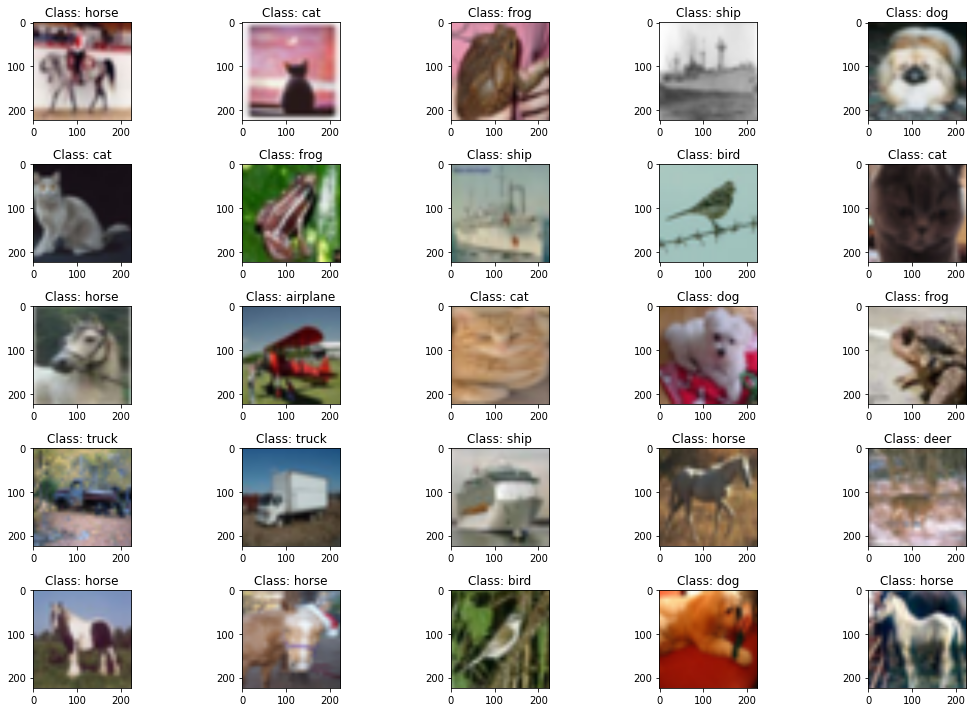

In [19]:
fig = plt.figure(figsize=(15, 10))

i = 1
for entry in test_set.take(25):

    sample_image = np.squeeze(entry[0].numpy()[0])
    sample_label = class_names[entry[1].numpy()[0]]
    ax = fig.add_subplot(5, 5, i)
    
    ax.imshow(np.array(sample_image, np.int32))
    ax.set_title("Class: %s" % (sample_label))
    i = i+1

plt.tight_layout()
plt.show()

In [20]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='effnet_transfer_learning.h5', save_best_only=True)

optimizer = keras.optimizers.Adam(learning_rate=2e-5)

new_model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer=optimizer, 
                  metrics=["accuracy"])

history = new_model.fit(train_set, 
                        epochs=10,
                        callbacks=[checkpoint],
                        validation_data=valid_set)

Epoch 1/10
1172/1172 [==============================] - 99s 80ms/step - loss: 1.7795 - accuracy: 0.5503 - val_loss: 1.2776 - val_accuracy: 0.8055


d:\ml-learning\ml_env\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
1172/1172 [==============================] - 91s 78ms/step - loss: 1.1410 - accuracy: 0.7567 - val_loss: 0.7728 - val_accuracy: 0.8637
Epoch 3/10
1172/1172 [==============================] - 92s 78ms/step - loss: 0.7921 - accuracy: 0.8066 - val_loss: 0.5387 - val_accuracy: 0.8776
Epoch 4/10
1172/1172 [==============================] - 92s 78ms/step - loss: 0.6136 - accuracy: 0.8307 - val_loss: 0.4338 - val_accuracy: 0.8848
Epoch 5/10
1172/1172 [==============================] - 92s 78ms/step - loss: 0.5071 - accuracy: 0.8517 - val_loss: 0.3775 - val_accuracy: 0.8891
Epoch 6/10
1172/1172 [==============================] - 92s 78ms/step - loss: 0.4365 - accuracy: 0.8667 - val_loss: 0.3520 - val_accuracy: 0.8892
Epoch 7/10
1172/1172 [==============================] - 92s 79ms/step - loss: 0.3772 - accuracy: 0.8825 - val_loss: 0.3413 - val_accuracy: 0.8913
Epoch 8/10
1172/1172 [==============================] - 93s 80ms/step - loss: 0.3380 - accuracy: 0.8889 - val_loss: 0.3373 -

In [21]:
new_model.save('effnet_transfer_learning.h5')

In [22]:
new_model.evaluate(test_set)

157/157 [==============================] - 10s 66ms/step - loss: 0.3312 - accuracy: 0.8888


[0.3312007784843445, 0.8888000249862671]

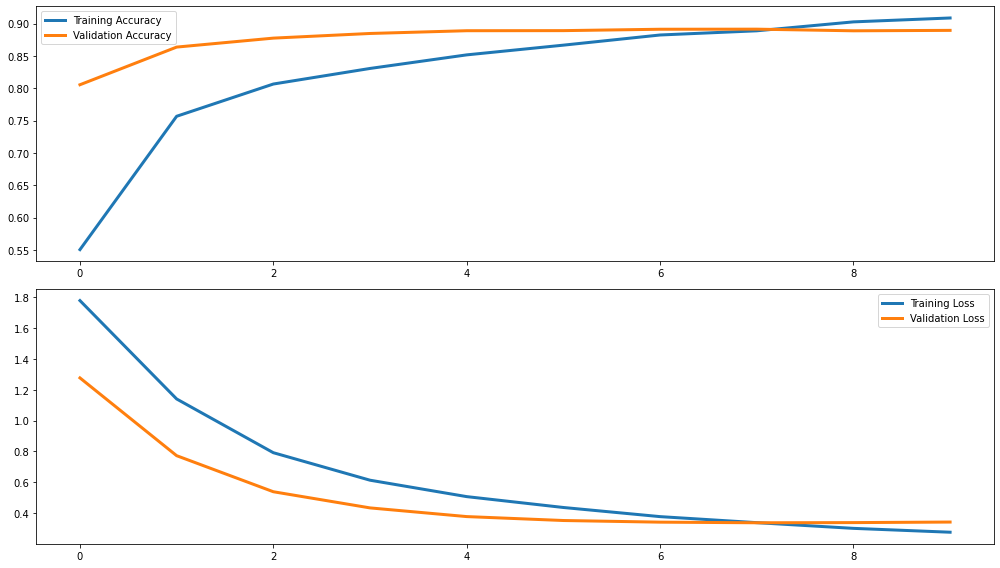

In [23]:
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(2, figsize=(14,8))
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["accuracy"], 
        label="Training Accuracy", lw=3)
ax[0].plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
        label="Validation Accuracy", lw=3)

ax[1].plot(np.arange(0, num_epochs), model_history["loss"], 
        label="Training Loss", lw=3)
ax[1].plot(np.arange(0, num_epochs), model_history["val_loss"], 
        label="Validation Loss", lw=3)

ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

In [39]:
model = keras.models.load_model('effnet_transfer_learning.h5')


for layer in model.layers:
    if isinstance(layer, keras.layers.BatchNormalization):
        layer.trainable = False
    else:
        layer.trainable = True

for index, layer in enumerate(model.layers):
    print("Layer: {}, Trainable: {}".format(index, layer.trainable))

Layer: 0, Trainable: True
Layer: 1, Trainable: True
Layer: 2, Trainable: True
Layer: 3, Trainable: True
Layer: 4, Trainable: True
Layer: 5, Trainable: False
Layer: 6, Trainable: True
Layer: 7, Trainable: True
Layer: 8, Trainable: False
Layer: 9, Trainable: True
Layer: 10, Trainable: True
Layer: 11, Trainable: True
Layer: 12, Trainable: True
Layer: 13, Trainable: True
Layer: 14, Trainable: True
Layer: 15, Trainable: True
Layer: 16, Trainable: False
Layer: 17, Trainable: True
Layer: 18, Trainable: False
Layer: 19, Trainable: True
Layer: 20, Trainable: True
Layer: 21, Trainable: True
Layer: 22, Trainable: False
Layer: 23, Trainable: True
Layer: 24, Trainable: True
Layer: 25, Trainable: True
Layer: 26, Trainable: True
Layer: 27, Trainable: True
Layer: 28, Trainable: True
Layer: 29, Trainable: True
Layer: 30, Trainable: False
Layer: 31, Trainable: True
Layer: 32, Trainable: False
Layer: 33, Trainable: True
Layer: 34, Trainable: True
Layer: 35, Trainable: False
Layer: 36, Trainable: True
Lay

In [25]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='effnet_transfer_learning_2.h5', save_best_only=True)

# Trying optimizer with 1e-6 lr
optimizer = keras.optimizers.Adam(learning_rate=1e-6, decay=(1e-6/50))

# Recompile after turning to trainable
model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer=optimizer, 
                  metrics=["accuracy"])

history_3 = model.fit(train_set, 
                        epochs=50,
                        callbacks=[checkpoint],
                        validation_data=valid_set)

Epoch 1/50
1172/1172 [==============================] - 389s 327ms/step - loss: 0.2031 - accuracy: 0.9316 - val_loss: 0.2916 - val_accuracy: 0.9075


d:\ml-learning\ml_env\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
1172/1172 [==============================] - 394s 336ms/step - loss: 0.1835 - accuracy: 0.9355 - val_loss: 0.2821 - val_accuracy: 0.9108
Epoch 3/50
1172/1172 [==============================] - 387s 330ms/step - loss: 0.1740 - accuracy: 0.9375 - val_loss: 0.2766 - val_accuracy: 0.9137
Epoch 4/50
1172/1172 [==============================] - 384s 328ms/step - loss: 0.1627 - accuracy: 0.9438 - val_loss: 0.2726 - val_accuracy: 0.9157
Epoch 5/50
1172/1172 [==============================] - 382s 326ms/step - loss: 0.1559 - accuracy: 0.9432 - val_loss: 0.2704 - val_accuracy: 0.9181
Epoch 6/50
1172/1172 [==============================] - 383s 327ms/step - loss: 0.1525 - accuracy: 0.9446 - val_loss: 0.2675 - val_accuracy: 0.9192
Epoch 7/50
1172/1172 [==============================] - 384s 328ms/step - loss: 0.1496 - accuracy: 0.9448 - val_loss: 0.2646 - val_accuracy: 0.9201
Epoch 8/50
1172/1172 [==============================] - 383s 326ms/step - loss: 0.1458 - accuracy: 0.9483 - val_

In [26]:
model.evaluate(test_set)

157/157 [==============================] - 10s 61ms/step - loss: 0.2149 - accuracy: 0.9384


[0.21492990851402283, 0.9383999705314636]

In [27]:
model.save('effnet_transfer_learning3.h5')

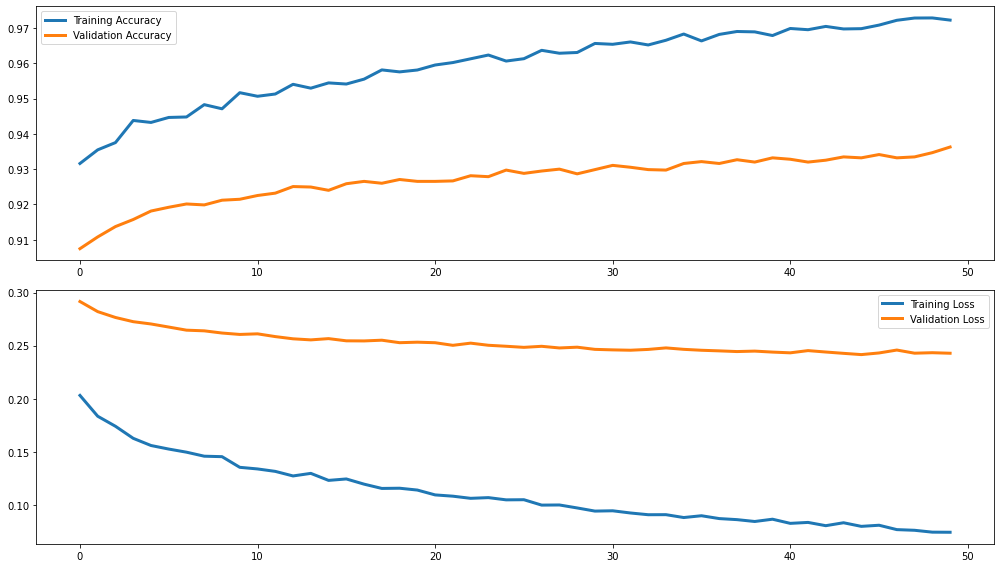

In [28]:
import pandas as pd

model_history = pd.DataFrame(history_3.history)
model_history['epoch'] = history_3.epoch

fig, ax = plt.subplots(2, figsize=(14,8))
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["accuracy"], 
        label="Training Accuracy", lw=3)
ax[0].plot(np.arange(0, num_epochs), model_history["val_accuracy"], 
        label="Validation Accuracy", lw=3)

ax[1].plot(np.arange(0, num_epochs), model_history["loss"], 
        label="Training Loss", lw=3)
ax[1].plot(np.arange(0, num_epochs), model_history["val_loss"], 
        label="Validation Loss", lw=3)

ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

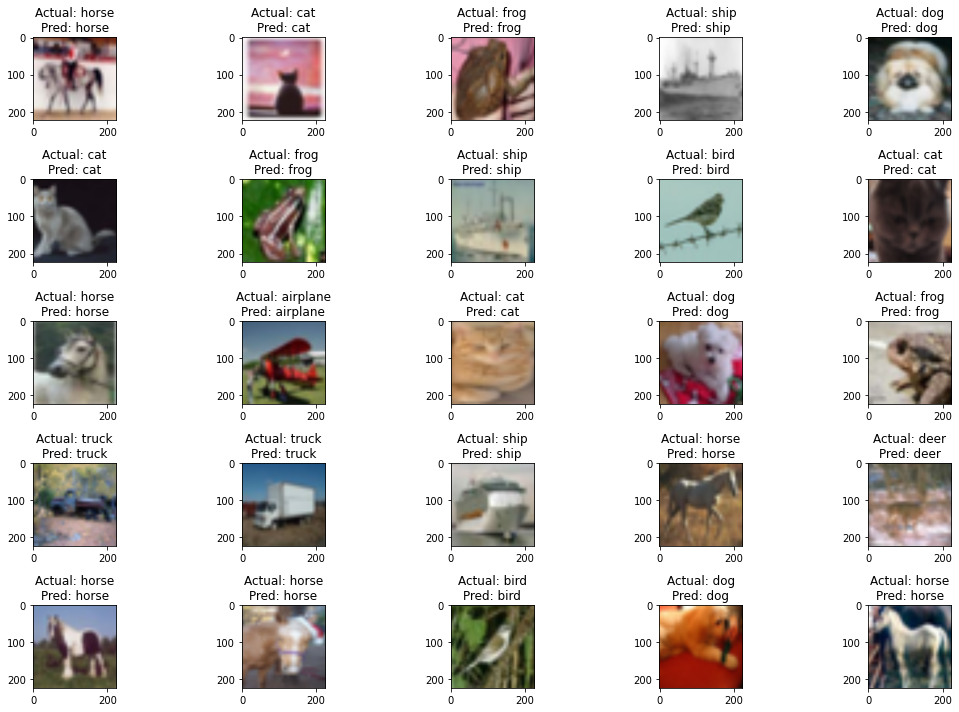

In [38]:
fig = plt.figure(figsize=(15, 10))

i = 1
for entry in test_set.take(25):
    # Predict, get the raw Numpy prediction probabilities
    # Reshape entry to the model's expected input shape
    pred = np.argmax(model.predict(entry[0].numpy()[0].reshape(1, 224, 224, 3)))

    # Get sample image as numpy array
    sample_image = entry[0].numpy()[0]
    # Get associated label
    sample_label = class_names[entry[1].numpy()[0]]
    # Get human label based on the prediction
    prediction_label = class_names[pred]
    ax = fig.add_subplot(5, 5, i)
    
    # Plot image and sample_label alongside prediction_label
    ax.imshow(np.array(sample_image, np.int32))
    ax.set_title("Actual: %s\nPred: %s" % (sample_label, prediction_label))
    i = i+1

plt.tight_layout()
plt.show()